In [1]:
import sys
!{sys.executable} -m pip install scipy

In [2]:
# --------
# -- Q1 --
# --------

'''
Numerical integration methods work differently depending on whether you have the analytic function available 
(in which case you can evaluate it freely at any point you please) or if it is sampled for you.
    - Consider the function . We want to integrate this from -5, 5 . The analytic integral is not easily obtained. 
        Use integrate.quad to do the integration.
    - Consider now that you have data that represents a function sampled a N points, but you don't know the analytic form of the function. 
        . Here, we create the sampling from a uniform distribution
        . Compute the integral of this sampled function using Simpson's method (integrate.simps).
        . Now, vary the number of sample points (try 64, 128, ...) and see how the answer changes. 
        . Simpson's method is 4-th order accurate, which means that the error should decrease by  when we double the number of sample points
        . Make a plot of the error (compared to the quadrature result) vs. N
'''

"\nNumerical integration methods work differently depending on whether you have the analytic function available \n(in which case you can evaluate it freely at any point you please) or if it is sampled for you.\n    - Consider the function . We want to integrate this from -5, 5 . The analytic integral is not easily obtained. \n        Use integrate.quad to do the integration.\n    - Consider now that you have data that represents a function sampled a N points, but you don't know the analytic form of the function. \n        . Here, we create the sampling from a uniform distribution\n        . Compute the integral of this sampled function using Simpson's method (integrate.simps).\n        . Now, vary the number of sample points (try 64, 128, ...) and see how the answer changes. \n        . Simpson's method is 4-th order accurate, which means that the error should decrease by  when we double the number of sample points\n        . Make a plot of the error (compared to the quadrature result)

In [3]:
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt

def func(x):
    return np.exp(-x**2)
I, err = integrate.quad(func, -5,5, epsabs=1.e-7, epsrel=1.e-7)
print(I)
print(err)

1.7724538509027912
4.6261378229003154e-14


In [4]:
N = 32
x = np.linspace(-5, 5, N)
f = np.exp(-x**2)
f

array([1.38879439e-11, 3.15061953e-10, 5.80457065e-09, 8.68481106e-08,
       1.05527775e-06, 1.04133225e-05, 8.34503173e-05, 5.43103745e-04,
       2.87047478e-03, 1.23208538e-02, 4.29481052e-02, 1.21580337e-01,
       2.79510942e-01, 5.21855680e-01, 7.91258065e-01, 9.74320895e-01,
       9.74320895e-01, 7.91258065e-01, 5.21855680e-01, 2.79510942e-01,
       1.21580337e-01, 4.29481052e-02, 1.23208538e-02, 2.87047478e-03,
       5.43103745e-04, 8.34503173e-05, 1.04133225e-05, 1.05527775e-06,
       8.68481106e-08, 5.80457065e-09, 3.15061953e-10, 1.38879439e-11])

In [5]:
Ns = [32,64,128,256,512]
errs = []

simpson :  1.7724538507774263    quadr :  1.7724538509027912
simpson :  1.7724538509012102    quadr :  1.7724538509027912
simpson :  1.7724538509027423    quadr :  1.7724538509027912
simpson :  1.7724538509027887    quadr :  1.7724538509027912
simpson :  1.7724538509027907    quadr :  1.7724538509027912


Text(0, 0.5, 'integral simpson - quadrature')

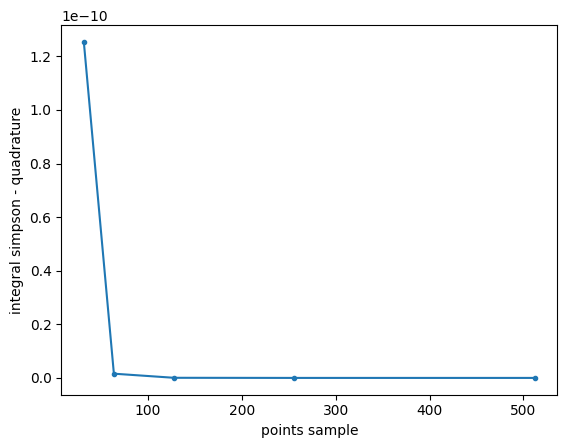

In [6]:
# uniform distr
vals = [64, 128, 256, 512]
errs = []

for N in Ns:
    xVals = np.linspace(-5, 5, N)
    y = func(xVals)
    
    int_simp = integrate.simpson(y,x=xVals)
    int_quad,err = integrate.quad(func, -5,5, epsabs=1.e-7, epsrel=1.e-7)

    print("simpson : ", int_simp, "   quadr : ", int_quad)
    diff = abs(int_simp - int_quad)
    errs.append(diff)

# drawing
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Ns,errs,marker=".")
ax.set_xlabel("points sample")
ax.set_ylabel("integral simpson - quadrature")

In [7]:
# --------
# -- Q2 --
# --------

'''
    - Create a python function, , that is your true function (make it complicated!). 
    - create  samples of it (either regularly spaced or irregularly spaced).
    - Try some of the different interpolation routines.  interpolate.interp1d takes a kind argument that let's you choose the order of the interpolation. 
    - Measure the error in the method, by comparing the interpolated result with the actual function value.

    - do the same cubic splines (look at CubicSpline)
    - Plot the resulting interpolant. 
'''


"\n    - Create a python function, , that is your true function (make it complicated!). \n    - create  samples of it (either regularly spaced or irregularly spaced).\n    - Try some of the different interpolation routines.  interpolate.interp1d takes a kind argument that let's you choose the order of the interpolation. \n    - Measure the error in the method, by comparing the interpolated result with the actual function value.\n\n    - do the same cubic splines (look at CubicSpline)\n    - Plot the resulting interpolant. \n"

In [8]:
import scipy.interpolate as interpolate

# sampling
def func_interp(x):
    return x**3*np.sin(x)
N = 30
x = np.linspace(0, 100, N)
f = func_interp(x)
f

array([ 0.00000000e+00, -1.23784605e+01,  1.88814133e+02, -8.80809195e+02,
        2.47033797e+03, -5.12168108e+03,  8.53723500e+03, -1.17946152e+04,
        1.33325210e+04, -1.11270725e+04,  3.06248501e+03,  1.25437355e+04,
       -3.63426065e+04,  6.73957100e+04, -1.02785275e+05,  1.37512852e+05,
       -1.64776500e+05,  1.76664610e+05, -1.65237587e+05,  1.23895609e+05,
       -4.88628907e+04, -5.94322701e+04,  1.95326289e+05, -3.47471914e+05,
        4.99158217e+05, -6.29500437e+05,  7.15489085e+05, -7.34760206e+05,
        6.68822033e+05, -5.06365641e+05])

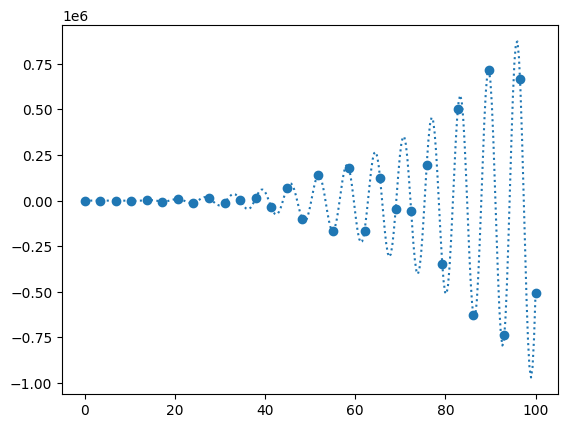

In [9]:
# define plot
fig, ax = plt.subplots()

x_fine = np.linspace(0, 100, 10*N)

ax.scatter(x, f)
ax.plot(x_fine, func_interp(x_fine), ls=":", label="original function")

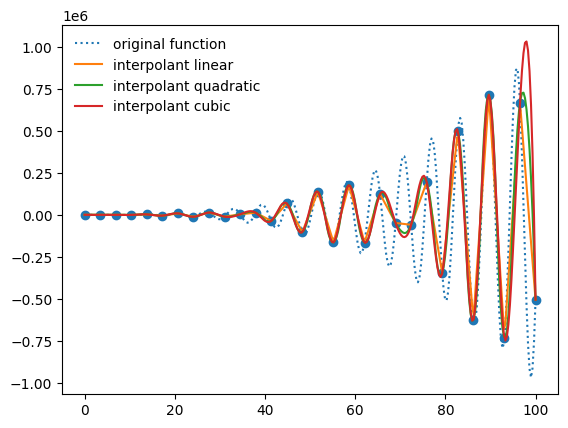

In [10]:
# interpolation with interpolate.
interpLin = interpolate.interp1d(x, f, kind="linear")
ax.plot(x_fine, interpLin(x_fine), label="interpolant linear")

interpQuad = interpolate.interp1d(x, f, kind="quadratic")
ax.plot(x_fine, interpQuad(x_fine), label="interpolant quadratic")

interpCub = interpolate.interp1d(x, f, kind="cubic")
ax.plot(x_fine, interpCub(x_fine), label="interpolant cubic")

ax.legend(frameon=False, loc="best")
fig

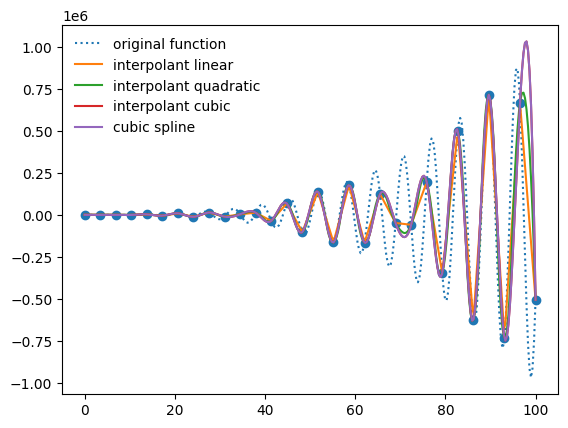

In [11]:
from scipy.interpolate import CubicSpline
# interpolating with cubic spline
cubicSpl = CubicSpline(x,f)
ax.plot(x_fine, cubicSpl(x_fine), label="cubic spline")
ax.legend(frameon=False, loc="best")
fig

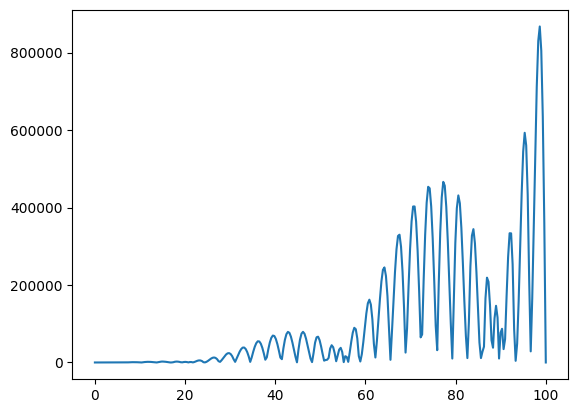

In [12]:
# errors
errLin = abs(interpLin(x_fine) - func_interp(x_fine))
errQuad = abs(interpQuad(x_fine) - func_interp(x_fine))
errCub = abs(interpCub(x_fine) - func_interp(x_fine))
errCubSpl = abs(cubicSpl(x_fine) - func_interp(x_fine))

figErr, axErr = plt.subplots()
axErr.plot(x_fine, errLin, label="err linear")

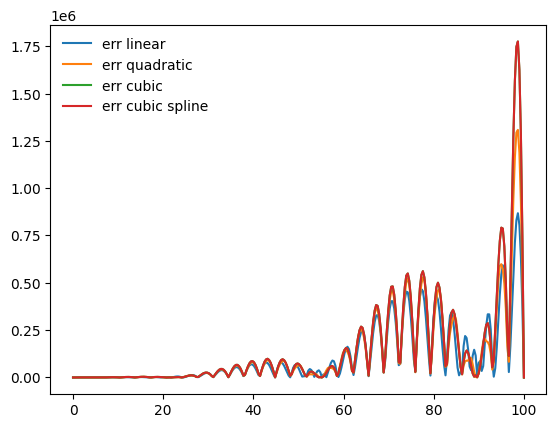

In [13]:
axErr.plot(x_fine, errQuad, label="err quadratic")
axErr.plot(x_fine, errCub, label="err cubic")
axErr.plot(x_fine, errCubSpl, label="err cubic spline")
axErr.legend(frameon=False, loc="best")
figErr

In [14]:
# --------
# -- Q3 --
# --------

'''
Consider the function 
$$q(x) = x^3 - 2x^2 - 11x + 12$$
This has 3 roots has you should find them all. This equation is known to cause problems for some root-finding methods becauses it 
exhibits basis of attraction -- very closely spaced initial guesses leave to very different roots.

Use the scipy optimize.brentq method to find the roots. You might need to play around with the intervals to find all 3 roots
(try plotting the function to help)
'''

'\nConsider the function \n$$q(x) = x^3 - 2x^2 - 11x + 12$$\nThis has 3 roots has you should find them all. This equation is known to cause problems for some root-finding methods becauses it \nexhibits basis of attraction -- very closely spaced initial guesses leave to very different roots.\n\nUse the scipy optimize.brentq method to find the roots. You might need to play around with the intervals to find all 3 roots\n(try plotting the function to help)\n'

In [15]:
import scipy.optimize as optimize

def f(x):
    return x**3 - 2*x**2 - 11*x + 12

In [16]:
N = 30
x = np.linspace(-10, 10, N)
y = f(x)
y

array([-1.07800000e+03, -8.65995408e+02, -6.82462668e+02, -5.25433679e+02,
       -3.92940342e+02, -2.83014556e+02, -1.93688220e+02, -1.22993235e+02,
       -6.89614990e+01, -2.96249129e+01, -3.01537578e+00,  1.28352126e+01,
        1.98949526e+01,  2.01319447e+01,  1.55142892e+01,  8.01008651e+00,
       -4.12563041e-01, -7.78555906e+00, -1.21408012e+01, -1.15101890e+01,
       -3.92562221e+00,  1.25809996e+01,  3.99777769e+01,  8.02328099e+01,
        1.35314199e+02,  2.07190045e+02,  2.97828447e+02,  4.09197507e+02,
        5.43265325e+02,  7.02000000e+02])

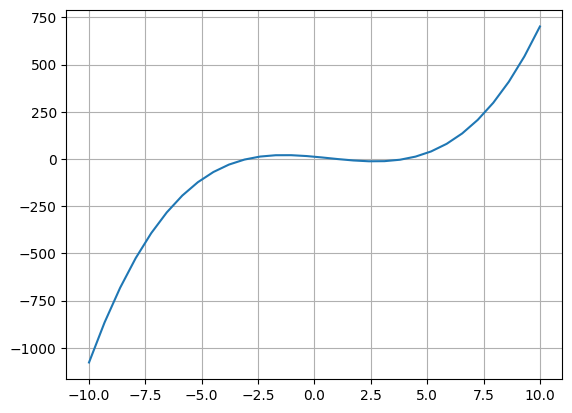

In [17]:
figure, ax = plt.subplots()
ax.plot(x, y, label="basin")
ax.grid(True)

In [18]:
root, r = optimize.brentq(f, -4, -2, full_output=True)

print(root)
print(r.converged)

-3.0
True


In [19]:
root2, r2 = optimize.brentq(f, 0, 2.5, full_output=True)

print(root2)
print(r2.converged)

1.000000000000242
True


In [20]:
root3, r3 = optimize.brentq(f, 2.5, 4, full_output=True)

print(root3)
print(r3.converged)

4.0
True
